In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import matplotlib.pyplot as plt
import plotly.express as px
import random

In [4]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [5]:
!kaggle datasets download -d ahemateja19bec1025/traffic-sign-dataset-classification
!unzip traffic-sign-dataset-classification.zip -d /content/traffic-sign-dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/traffic-sign-dataset/traffic_Data/DATA/24/024_1_0040.png  
  inflating: /content/traffic-sign-dataset/traffic_Data/DATA/24/024_1_0041.png  
  inflating: /content/traffic-sign-dataset/traffic_Data/DATA/24/024_1_0042.png  
  inflating: /content/traffic-sign-dataset/traffic_Data/DATA/24/024_1_0043.png  
  inflating: /content/traffic-sign-dataset/traffic_Data/DATA/24/024_1_0044.png  
  inflating: /content/traffic-sign-dataset/traffic_Data/DATA/24/024_1_0045.png  
  inflating: /content/traffic-sign-dataset/traffic_Data/DATA/24/024_1_0046.png  
  inflating: /content/traffic-sign-dataset/traffic_Data/DATA/24/024_1_0047.png  
  inflating: /content/traffic-sign-dataset/traffic_Data/DATA/24/024_1_0048.png  
  inflating: /content/traffic-sign-dataset/traffic_Data/DATA/24/024_1_0049.png  
  inflating: /content/traffic-sign-dataset/traffic_Data/DATA/25/025_0001.png  
  inflating: /content/traffic-sign-dataset/traffic_Data/DATA

In [7]:
import os
import pandas as pd

inputBasePath = '/content/traffic-sign-dataset'
trainingFolder = os.path.join(inputBasePath, 'traffic_Data/DATA')
testingFolder = os.path.join(inputBasePath, 'traffic_Data/TEST')
classes = pd.read_csv(os.path.join(inputBasePath, 'labels.csv'))
classes_size = len(classes)

print("Total number of classes: ", classes_size)


Total number of classes:  58


In [8]:
traffic_data = []
training_data = []
labels = []
def fetch_images(traffic_data, labels):
    for classValue in os.listdir(os.path.join(inputBasePath, trainingFolder)):
        classPath = os.path.join(inputBasePath, trainingFolder, classValue)
        labels.append(classValue)
        for trafficSignal in os.listdir(classPath):
            imgTrafficSignal = Image.open(os.path.join(classPath,trafficSignal))
            imgTrafficSignal = imgTrafficSignal.convert("L")
            imgTrafficSignal = imgTrafficSignal.resize((90,90))
            imgTrafficSignal = np.array(imgTrafficSignal)
            traffic_data.append((imgTrafficSignal,[int(classValue)]))
    #training_data = np.array(training_data)
    labels = np.array(labels)
    return traffic_data, labels

In [9]:
traffic_data, labels = fetch_images(traffic_data, labels)
traffic_data_features, traffic_data_labels = zip(*traffic_data)
training_data_features, validation_data_features, training_data_labels, validation_data_labels = train_test_split(traffic_data_features, traffic_data_labels, test_size=0.33, random_state=42)
training_data_features = np.array(training_data_features)
training_data_labels = np.array(training_data_labels)
validation_data_features = np.array(validation_data_features)
validation_data_labels = np.array(validation_data_labels)
print(training_data_features.shape)
print(training_data_labels.shape)

(2793, 90, 90)
(2793, 1)


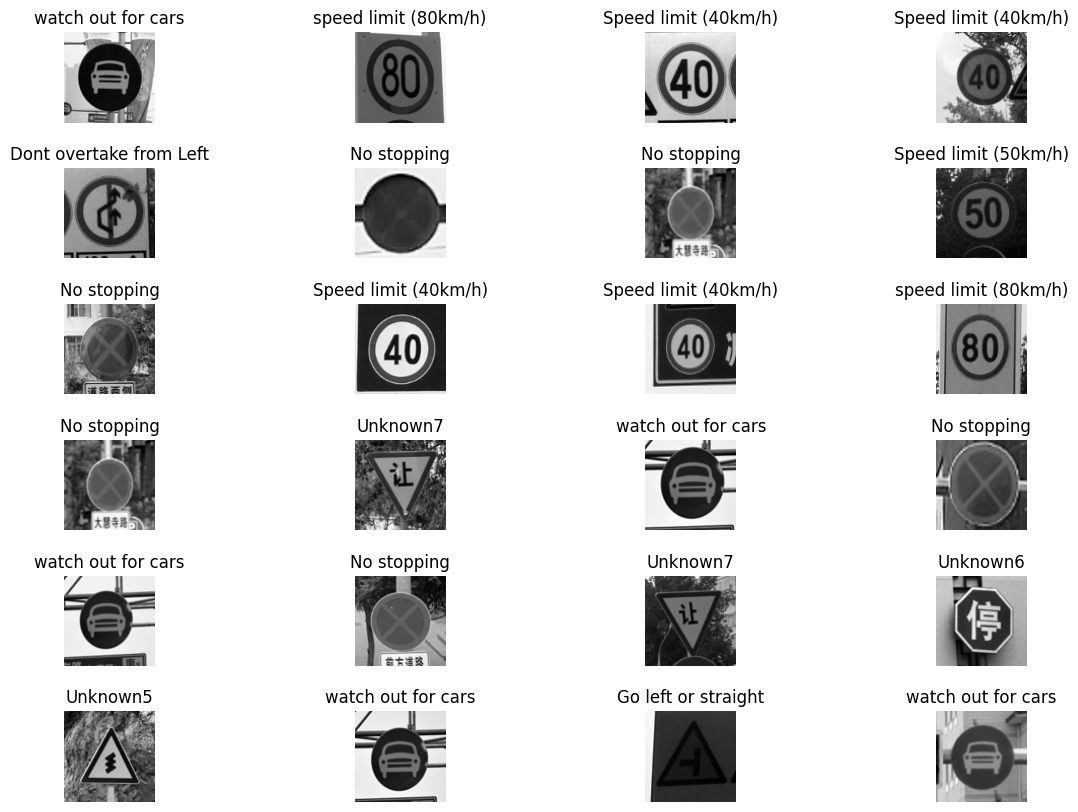

In [10]:
# Visualizing some of the training data
# display_images = training_data_features[40:64]
# display_labels = training_data_labels[40:64]
def imageDisplayer(data_features, data_labels_act, data_labels_pred=None):
    rows, cols = 6, 4
    fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

    plt.subplots_adjust(wspace=0, hspace=0.5)
    if data_labels_pred is not None:
        for row in range(rows):
            for col in range(cols):
                i = row * cols + col  # Calculate the index
                randomVal = random.randint(1,2)
                # Get the image and label for the current index
                display_image = data_features[i*randomVal]
                display_label_act = classes['Name'][data_labels_act[i*randomVal][0]]
                display_label_pred = classes['Name'][data_labels_pred[i*randomVal]]

                # Display the image
                axes[row, col].imshow(display_image, cmap='gray')
                axes[row, col].set_title((display_label_act, display_label_pred))
                axes[row, col].axis('off')
    else:
        for row in range(rows):
            for col in range(cols):
                i = row * cols + col  # Calculate the index
                randomVal = random.randint(1,2)
                # Get the image and label for the current index
                display_image = data_features[i*randomVal]
                display_label = classes['Name'][data_labels_act[i*randomVal][0]]

                # Display the image
                axes[row, col].imshow(display_image, cmap='gray')
                axes[row, col].set_title(display_label)
                axes[row, col].axis('off')
imageDisplayer(training_data_features, training_data_labels)

In [11]:
def convolutionModel():
    cnnModel = Sequential()
    cnnModel.add(Conv2D(16,(3,3), padding="same", input_shape=(90, 90, 1), activation='relu'))
    print(cnnModel(training_data_features).shape)
    cnnModel.add(MaxPool2D((2,2), strides=None, padding="same"))
    cnnModel.add(Conv2D(32,(3,3), padding="same", activation='relu'))
    cnnModel.add(MaxPool2D((2,2), strides=None, padding="same"))
    cnnModel.add(Conv2D(64,(5,5), padding="same", activation='relu'))
    cnnModel.add(MaxPool2D((2,2), strides=None, padding="same"))
    cnnModel.add(Conv2D(128,(7,7), padding="same", activation='relu'))
    cnnModel.add(MaxPool2D((2,2), strides=None, padding="same"))
    cnnModel.add(Flatten())
    cnnModel.add(Dense(232, activation='relu'))
    cnnModel.add(Dense(116, activation='relu'))
    cnnModel.add(Dense(58, activation='softmax'))
    return cnnModel

In [12]:
epochs = 12
batchSize = 14
cnnModel = convolutionModel()
cnnModel.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


(2793, 90, 90, 16)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 90, 90, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 45, 45, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 45, 45, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 23, 23, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 128)         │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 232)                 │       1,069,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 116)                 │          27,028 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 58)                  │           6,786 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,560,702 (5.95 MB)

 Trainable params: 1,560,702 (5.95 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
print(training_data_features.shape, training_data_labels.shape)
print(training_data_labels)

(2793, 90, 90) (2793, 1)
[[28]
 [54]
 [ 7]
 ...
 [ 5]
 [42]
 [55]]


In [14]:
cnnModel.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
trafficSignNetwork = cnnModel.fit(training_data_features, training_data_labels, batch_size=batchSize, epochs=epochs, validation_data=(validation_data_features, validation_data_labels))

Epoch 1/12


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


200/200 ━━━━━━━━━━━━━━━━━━━━ 74s 348ms/step - accuracy: 0.1489 - loss: 5.3648 - val_accuracy: 0.5468 - val_loss: 1.7928
Epoch 2/12
200/200 ━━━━━━━━━━━━━━━━━━━━ 90s 450ms/step - accuracy: 0.6318 - loss: 1.4184 - val_accuracy: 0.8003 - val_loss: 0.7290
Epoch 3/12
200/200 ━━━━━━━━━━━━━━━━━━━━ 130s 390ms/step - accuracy: 0.8390 - loss: 0.5888 - val_accuracy: 0.8744 - val_loss: 0.4814
Epoch 4/12
200/200 ━━━━━━━━━━━━━━━━━━━━ 75s 356ms/step - accuracy: 0.9137 - loss: 0.2907 - val_accuracy: 0.9325 - val_loss: 0.2766
Epoch 5/12
200/200 ━━━━━━━━━━━━━━━━━━━━ 74s 369ms/step - accuracy: 0.9486 - loss: 0.1919 - val_accuracy: 0.9223 - val_loss: 0.3051
Epoch 6/12
200/200 ━━━━━━━━━━━━━━━━━━━━ 74s 372ms/step - accuracy: 0.9720 - loss: 0.1263 - val_accuracy: 0.9535 - val_loss: 0.2182
Epoch 7/12
200/200 ━━━━━━━━━━━━━━━━━━━━ 80s 365ms/step - accuracy: 0.9596 - loss: 0.1483 - val_accuracy: 0.9317 - val_loss: 0.2703
Epoch 8/12
200/200 ━━━━━━━━━━━━━━━━━━━━ 82s 368ms/step - accuracy: 0.9549 - loss: 0.1889 - va

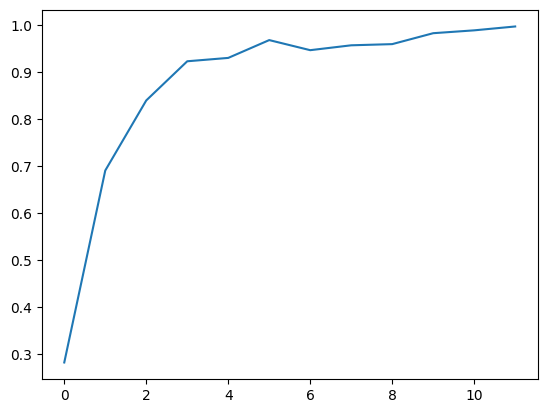

In [15]:
plt.plot(trafficSignNetwork.history['accuracy'], label='accuracy')

In [16]:
# Evaluating the model on test data
testing_data = []
for test_image_file in os.listdir(os.path.join(inputBasePath, testingFolder)):
    testImage = Image.open(os.path.join(inputBasePath, testingFolder, test_image_file))
    testImage = testImage.convert("L")
    testImage = testImage.resize((90,90))
    testImage = np.array(testImage)
    testing_data.append((testImage, [int(test_image_file[1:3])]))
testing_data_features, testing_data_labels = zip(*testing_data)
testing_data_features = np.array(testing_data_features)
testing_data_labels = np.array(testing_data_labels)

In [17]:
# Evaluate the test data
predictions = cnnModel.predict(testing_data_features)
predicted_labels = np.argmax(predictions, axis=1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 189ms/step


35           Zebra Crossing
4      Speed limit (50km/h)
55                 No entry
10         Dont Go straight
52                 Unknown6
              ...          
3      Speed limit (40km/h)
56                 Unknown7
29                     Horn
15                 No Uturn
12    Dont Go Left or Right
Name: Name, Length: 1994, dtype: object
35          Zebra Crossing
5     Speed limit (60km/h)
30       Bicycles crossing
10        Dont Go straight
26              keep Right
              ...         
30       Bicycles crossing
13           Dont Go Right
29                    Horn
13           Dont Go Right
11            Dont Go Left
Name: Name, Length: 1994, dtype: object


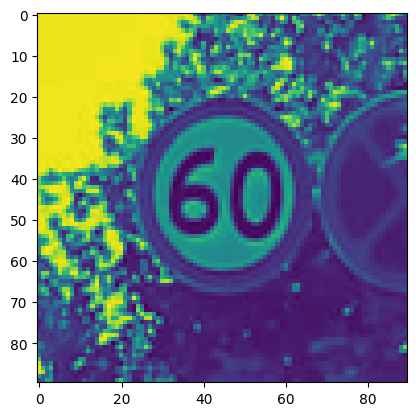

In [18]:
# Visualize Result Data and Actual Data
print(classes['Name'][predicted_labels])
print(classes['Name'][testing_data_labels[:,0]])
plt.imshow(testing_data_features[1])

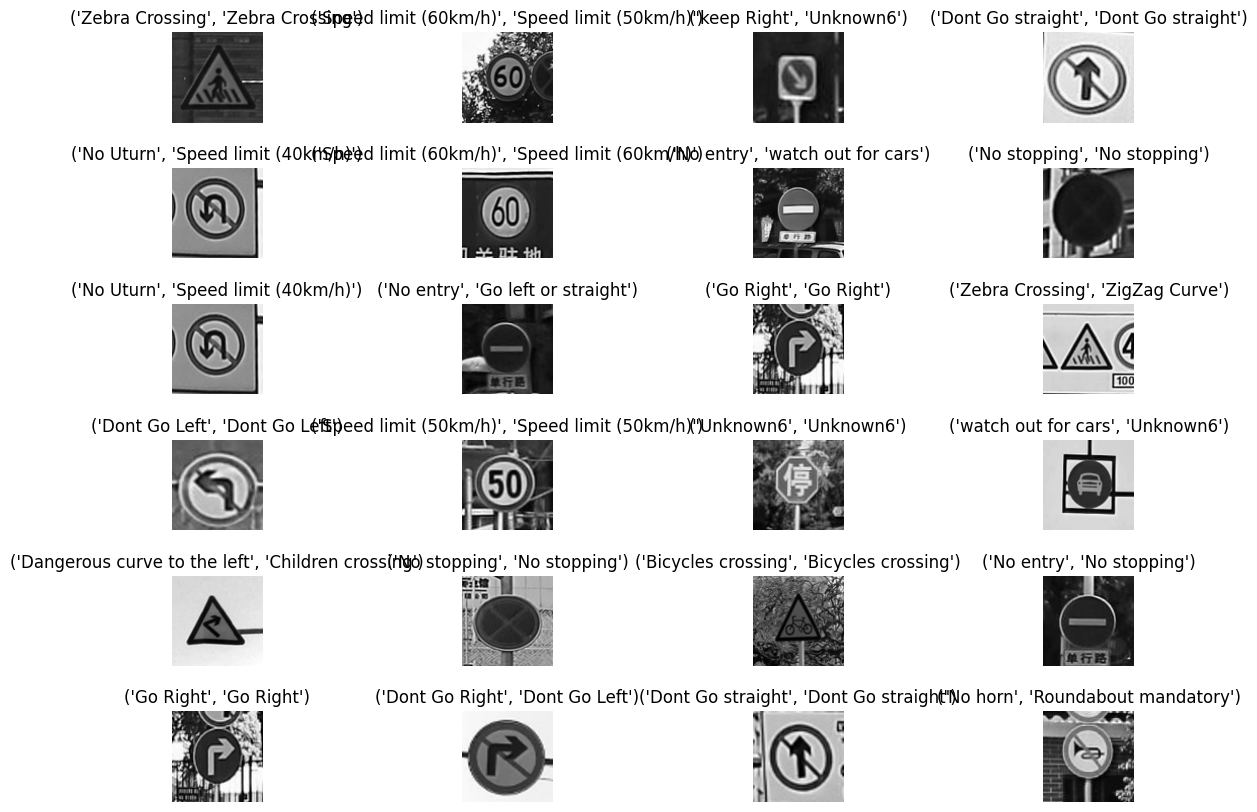

In [19]:
imageDisplayer(testing_data_features, testing_data_labels, predicted_labels)
# (Actual Label, Predicted Label)

In [20]:
test_loss, test_acc = cnnModel.evaluate(testing_data_features, testing_data_labels, verbose=2)
print(test_acc)

63/63 - 12s - 198ms/step - accuracy: 0.5065 - loss: 4.7039
0.5065195560455322
